In [1]:
# Import all packages used
import pandas as pd
import numpy as np
import spacy as sp
import string
import en_core_web_sm
import nltk as nl
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn import svm

from sklearn.ensemble import RandomForestClassifier


from sklearn.naive_bayes import BernoulliNB

model = svm.SVC()
param = {'kernel': ['linear','rbf']}

lemm_obj = sp.load('en_core_web_lg')
lemm_obj.max_length = 1500000
ps = nl.PorterStemmer()

vect_cnt = CountVectorizer(analyzer='word',min_df=1,stop_words='english',token_pattern='[a-zA-Z0-9]{1,}')
tfidf_vect = TfidfVectorizer(analyzer = 'word', min_df = 1, stop_words = 'english',vocabulary=20000, token_pattern = '[a-zA-Z0-9]{1,}')

allowed_postags = ['NOUN','ADJ','VERB','ADV']

import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import time
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import IPython

C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Import ratings data
ratings_data = pd.read_csv(r"D:\Machine Learning\Vamsi Thesis\Data\ml-25m\ratings.csv")
ratings_data.head()
ratings_data = ratings_data.drop(columns=['timestamp'], axis = 1)
ratings_data.drop_duplicates(inplace=True)
print(ratings_data.shape)
print(ratings_data.info())
# Import movie Data
movie_details = pd.read_pickle(r"D:\Machine Learning\Vamsi Thesis\Code\Results\fullMovieData.pkl")
movie_details.dropna(inplace=True)
movie_details=movie_details['movieId']
print(movie_details)
# Aggregate Movie details
recomm_df = pd.merge(movie_details,ratings_data, on = 'movieId', how = 'inner')
recomm_df.info()
ratings_data_gr = (recomm_df.groupby(by = ['userId'])['rating'].count().reset_index())
ratings_data_gr.info()
ratings_data_gr.sort_values('rating', ascending=False)
# Filter only users with more than 300 reviews
ratings_data_gr = ratings_data_gr[ratings_data_gr['rating']>=300]
print(ratings_data_gr.info())
ratings_data_gr.sort_values('rating',ascending=False)
ratings_data_gr.drop(columns=['rating'],axis=1,inplace=True)
imp_users = pd.merge(recomm_df,ratings_data_gr, on = 'userId', how = 'inner')
print(imp_users)
print(imp_users.info())


(25000095, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000095 entries, 0 to 25000094
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 762.9 MB
None
0             1
1             2
2             3
3             4
4             5
          ...  
10397    124273
10398    125429
10399    127272
10400    128439
10401    130077
Name: movieId, Length: 10402, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16511297 entries, 0 to 16511296
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   userId   int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 503.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162463 entries, 0 to 162462
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   userId  162463 non-null

In [57]:
imp_users.head()

,movieId,userId,rating
0,1,3,4.0
1,32,3,4.5
2,50,3,5.0
3,172,3,4.0
4,173,3,3.0


In [50]:
def reco_with_gen_mixes(model,var):
    # importing Genre mix
    print("Generating Recommendations for Model: "+model+" Variable: "+ var)
#     gen_prob_data = pd.read_pickle(r"D:\Machine Learning\Vamsi Thesis\Code\Results\\" + model + "_Probability_Distribution_" + var + ".pkl")
    gen_prob_data = pd.read_csv(r"D:\Machine Learning\Vamsi Thesis\Code\Results\\" + model + "_Probability_Distribution_" + var + ".csv")
    #print(gen_prob_data.shape)
    gen_prob_data.dropna(inplace=True)
    
#     gen_prob_data.info()
    Genr_clusters = gen_prob_data.iloc[:,29:48]
    probList = Genr_clusters.columns.tolist()
    # Genr_clusters.info()
    from sklearn.cluster import KMeans
    wcss = []
    for i in range(1, 100):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
        kmeans.fit(Genr_clusters)
        wcss.append(kmeans.inertia_)
        diff=(wcss[i-2]-wcss[i-1])/wcss[i-1]
        if (i>1 and diff<=0.01):
            nc = i
            break;
    print("Total number of clusters: "+ str(nc))
    plt.plot(range(1, nc+1), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    kmeans = KMeans(n_clusters = nc, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(Genr_clusters)
    y_kmeans.shape
    gen_prob_data['clusters'] = y_kmeans.tolist()
    print(gen_prob_data)

    del Genr_clusters

    cluster_Movie_count= (gen_prob_data.groupby(by = ['clusters']).count().reset_index())
    #print(cluster_Movie_count)
    gen_prob_data = gen_prob_data.loc[:,~gen_prob_data.columns.duplicated()]
    gen_prob_data.reset_index(inplace = True)
    user_movie_cluster = gen_prob_data[['movieId','clusters']]
    #user_movie_cluster.info()
    print(user_movie_cluster)
    # merge rating data with available movie data

    recomm_df = pd.merge(user_movie_cluster,imp_users, left_on=['movieId'], right_on=['movieId'], how = 'inner')
#     recomm_df.info()
    # Group movie+ratings data to see how many ratings 
    cluster_user_preference = recomm_df.groupby(['userId','clusters'])['rating','movieId'].agg({'rating':'mean','movieId':'count'}).reset_index()
#     cluster_user_preference=cs_grouped.agg({'rating':'mean','movieId':'count'}).reset_index()
#     cluster_user_preference.info()
    cluster_user_preference.rename(columns={'rating':'a_rating','movieId':'movie_cnt'},inplace=True)
#     cluster_user_preference.info()
#     cluster_users=pd.DataFrame()
    def min_max_scaling(df,by_var,summ_var):
    #     get max
        min_df = df.groupby(by=[by_var])[summ_var].min().reset_index()
        min_df.rename(columns={summ_var:'min'+summ_var},inplace=True)
#         min_df.info()
    #     get min
        max_df = df.groupby(by=[by_var])[summ_var].max().reset_index()
        max_df.rename(columns={summ_var:'max'+summ_var},inplace=True)
        min_max = pd.merge(min_df,max_df,on=by_var,how='inner')
        min_max['scale_'+summ_var] = min_max['max'+summ_var] - min_max['min'+summ_var]
        df=df.merge(min_max,on=by_var,how='inner')
#         df.info()
        df['scaled_'+summ_var] = (df[summ_var]-df['min'+summ_var])/(df['scale_'+summ_var])
        
        return df
    cluster_users=min_max_scaling(cluster_user_preference,'userId','a_rating')
#     get sum of movies
    sum_df = cluster_user_preference.groupby(by=['userId'])['movie_cnt'].sum().reset_index()
    sum_df.rename(columns={'movie_cnt':'agg_movie_cnt'},inplace=True)
#     cluster_users.info()
    cluster_users = cluster_users.merge(sum_df,on='userId',how='inner')
#     cluster_users.info()
    cluster_users['movie_prob'] = cluster_users['movie_cnt']/cluster_users['agg_movie_cnt']
    cluster_users['reco_score'] = cluster_users['scaled_a_rating']*cluster_users['movie_prob']
    
# #     Scoring
    cluster_users = min_max_scaling(cluster_users,'userId','reco_score')
#     cluster_users.info()
    cluster_users['Final_reco_score']=cluster_users['scaled_reco_score']*100
# #     print(cluster_users)
    cluster_users = cluster_users[['userId','clusters','a_rating','movie_cnt','Final_reco_score']]
    cluster_users.to_excel("D:\Machine Learning\Vamsi Thesis\Code\Results\\" + model + "_user_preferences_" + var + ".xlsx",index=False)
    user_imp_clusters = cluster_users[['userId','clusters','Final_reco_score']]
    #Take only clusters with score greater than 75
    user_imp_clusters = user_imp_clusters[user_imp_clusters['Final_reco_score']>=75]
    
    user_imp_clusters = pd.merge(user_imp_clusters,user_movie_cluster, on=['clusters'],how='inner')
    final_reco_data = pd.merge(user_imp_clusters,recomm_df,on=['userId','movieId','clusters'], how='left') 
    final_reco_data['rating'] = final_reco_data['rating'].fillna(0)
    final_reco_data[final_reco_data['userId']==187].to_excel("D:\Machine Learning\Vamsi Thesis\Code\Results\Final Recom\\" + model + "_final_reco_" + var + ".xlsx",index=False)

Generating Recommendations for Model: SVM Variable: tt
Total number of clusters: 16


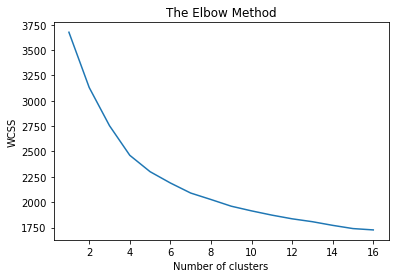

       movieId                                 trailer_transcript  \
0          1.0  sergeant yes sir establish your recon post dow...   
1          2.0  I you decided to buy this place I'm sure that ...   
2          8.0  and where do you think you're going I'm just r...   
3         10.0  when the world is the target 72 hours ago a se...   
4         11.0  the president has asked me to convey to you th...   
...        ...                                                ...   
3543  118872.0  this is really happening yeah you know this if...   
3544  118876.0  deep in the heart of Africa time a zebra of a ...   
3545  118894.0  repeat after me Open Sesame destiny opens that...   
3546  118898.0  when it feels scary to jump that is exactly wh...   
3547  118904.0  coming students of AIT a terrorist dream a wea...   

                                                   plot  movie_id  Sci-Fi  \
0     A little boy named Andy loves to be in his roo...       1.0     0.0   
1     Jumanji, on

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [52]:
reco_with_gen_mixes('SVM','tt')